<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/An%C3%A1lise_de_Sentimento_(twitter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimento (twitter)
---

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-yellow.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkblue.svg)](https://medium.com/@daniel.s.amador)

![img](https://image.freepik.com/fotos-gratis/smartphone-com-o-logotipo-do-twitter-na-tela_89286-40.jpg)

Muito provavelmente você lembra do **Orkut**. A rede social que permitia adicionar amigos, postar comentários, deixar depoimentos, participar de comunidades etc, não foi a primeira, mas sem dúvida foi a grande revolucionária desse mercado, mesmo tendo surgido em 2004 e acabado em 2014.

Acontece, que o sucesso do **Orkut** acabou mostrando a força de uma rede social e, outros grandes nomes acabaram surgindo e tomaram conta do mercado, como **Facebook**, **Instagram** e **Twitter**, dentre outras.

Cada uma tem um foco ou mais de um e, sem dúvida, o **twitter** acabou se tornando um mural das lamentações ou, no mínimo um mural de opiniões públicas. A própria ferramenta disponibiliza uma **Api** que permite a extração de dados para que possa ser feita a análise.

Os dados abaixos são extraidos do **Twitter** e são refenciados ao governo de **Minas Gerais**.

## Sobre o projeto

A base de dados contém o twitter e um **sentimento atribuído** 
- Positivo
- Negativo
- Neutro

A tarefa não é tão simples, uma vez que a linguagem é dotada de atributos não-objetivos como ironia.

Ao processar um contexto, é muito difícil para os algoritmos compreenderem, por isso várias técnicas são utilizadas e cada uma tem suas vantagens.

Iremos modelar o problema e depois testar seu desempenho com novas frases criadas.

## Checklist

1. Limpeza de Dados
2. Criando o Modelo
3. Avaliando o Modelo
4. Tuning do Modelo






**Importando as bibliotecas necessárias**

In [ ]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Carregando a base de dados**

O encoding='utf-8' oferece suporte para vários idiomas, logo, ao passá-lo conseguiremos diminuir a margem de erro de codificação.

In [ ]:
dataset = pd.read_csv('Tweets_Mg.csv',encoding='utf-8')

# 1. Limpeza dos dados

A base  contém  8199 dados.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

**Visualizando as 50 primeiras linhas**

O 'display.max_colwidth' nos permite expandir a leitura dos dados sem truncar, como é o padrão da bibliotecas pandas.

In [ ]:
# Expante o tamanho de exibição de coluna de texto
pd.set_option('display.max_colwidth', -1)
dataset.Text.head(50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                          
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                              
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                             
3     ��� https://t.co/BnDsO34qK0                                                                                                                 
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5              
5     " bom é bandido morto"\nDeputado Cabo Júlio é condenado e fica inelegível por 10 anos - Politica - Estado de Minas https://t.co/3GfAqvrFHS  
6     "..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq

Em um processo de coleta, via Api, Web Scraping ou outro método, é comum termos linhas duplicadas, por isso é importante apagá-las.

In [ ]:
dataset.drop_duplicates(['Text'],inplace=True)

Veja quantas linhas, agora temos 5675 linhas ao invés das 8199 iniciais.

In [ ]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

As colunas **Unnamed** não nos retornam nada, então vamos apagar todas elas.

In [ ]:
for i in dataset.columns.values:
    if i.startswith('Unnamed'): # tudo que iniciar com 'Unnamed' será deletada
        dataset.drop(i, axis=1, inplace=True)
        print ('Colunas Deletadas:', i)

Colunas Deletadas: Unnamed: 0
Colunas Deletadas: Unnamed: 10
Colunas Deletadas: Unnamed: 11
Colunas Deletadas: Unnamed: 12
Colunas Deletadas: Unnamed: 13
Colunas Deletadas: Unnamed: 14
Colunas Deletadas: Unnamed: 15
Colunas Deletadas: Unnamed: 16
Colunas Deletadas: Unnamed: 17
Colunas Deletadas: Unnamed: 18
Colunas Deletadas: Unnamed: 19
Colunas Deletadas: Unnamed: 20
Colunas Deletadas: Unnamed: 21
Colunas Deletadas: Unnamed: 22
Colunas Deletadas: Unnamed: 23
Colunas Deletadas: Unnamed: 24


**Verificando se as colunas foram dropadas**

In [ ]:
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

**Verificando a distribução das classes**

Temos a classe positiva como majoritária e a negativa é cerca de 33% dela.

In [ ]:
dataset.Classificacao.value_counts()

Positivo    2840
Neutro      1974
Negativo    951 
Name: Classificacao, dtype: int64

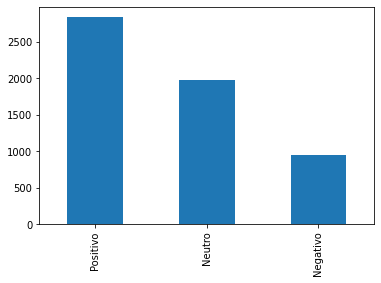

In [ ]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar');

# 2. Criando o Modelo

**Separando os tweets das classes**

In [ ]:
tweets = dataset['Text']
classes = dataset['Classificacao']

**Gerando o modelo**

O CountVectorizer transforma o texto em uma matriz de contagem de tokens.



In [ ]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)

In [ ]:
type(freq_tweets)

scipy.sparse.csr.csr_matrix

**Perceba**

Aquela base de dados que continha apenas um colunas, agora é uma matriz com 13.029 colunas.

In [ ]:
freq_tweets.shape

(5765, 13029)

In [ ]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Instanciando modelo com Naive Bayes Multinomial**

Normalmente esse algoritmo se sai muito bem, uma vez que é um algoritmo probabilístico.



In [ ]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Testando o modelo com algumas instâncias simples**

In [ ]:
testes = [
          'Esse governo? Cara, sinceramente gosto dele kkkk',
          'Tá, vou fingir que gostei desse governo atual',
          'E quase impossivel gostar desse novo governo!!!',
          'Não gosto do prefeito não',
          'Uma, vez PT, sempre PT',
          'Por enquanto não sei o que pennsar',
          'Por enquanto não sei o que pennsar',
          'Caraca, faz tempo que não sei o que é ficar feliz com um governo assim',
          'Estou muito feliz!!!'
          ]

**Transformando os dados de teste em vetores de palavras**


In [ ]:
freq_testes = vectorizer.transform(testes)

**Classificando as frases de teste**

In [ ]:
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

Esse governo? Cara, sinceramente gosto dele kkkk, Negativo
Tá, vou fingir que gostei desse governo atual, Neutro
E quase impossivel gostar desse novo governo!!!, Negativo
Não gosto do prefeito não, Negativo
Uma, vez PT, sempre PT, Negativo
Por enquanto não sei o que pennsar, Negativo
Por enquanto não sei o que pennsar, Negativo
Caraca, faz tempo que não sei o que é ficar feliz com um governo assim, Neutro
Estou muito feliz!!!, Neutro


**Probabilidade de cada classe**

In [ ]:
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.96, 0.04, 0.  ],
       [0.49, 0.51, 0.  ],
       [0.44, 0.3 , 0.26],
       [0.98, 0.02, 0.  ],
       [0.63, 0.37, 0.  ],
       [0.54, 0.42, 0.04],
       [0.54, 0.42, 0.04],
       [0.41, 0.59, 0.  ],
       [0.02, 0.97, 0.01]])

# 3. Avaliando o Modelo

**Fazendo a validação cruzada com 10 folds**

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

**Matriz de confusão**

In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo  846       100     5         951 
Neutro    206       1656    112       1974
Positivo  53        294     2493      2840
All       1105      2050    2610      5765


**Matriz de validação**

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.91      2840
    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



# 4. Tuning do Modelo

Será que conseguimos melhorar?

O **GridSearchCV** faz uma validação com os parâmetros passados em suas possíveis combinações e nos retorna o melhor *score* possível.

No algoritmo **Naive Bayes** o parâmetro **Alpha** é o que mais altera seu resultado final, então vamos testar algumas configurações com ele sendo alterado.

**Instanciando o modelo**

In [ ]:
from sklearn.model_selection import GridSearchCV

**Criando lista com os valores que queremos**

In [ ]:
lista_alpha = list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Criando o dicionários**

Somente é possível após a criação do dicionário.

In [ ]:
parametros_grid = dict(alpha=lista_alpha)

**Intanciando o novo modelo**

In [ ]:
modelo2 = MultinomialNB()

**Criando o objeto Grid**

In [ ]:
grid = GridSearchCV(modelo2, parametros_grid, cv=10, scoring='accuracy')

**Treinando os dados**

In [ ]:
freq_tweets = vectorizer.fit_transform(tweets)
grid.fit(freq_tweets, classes)

GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

**Melhores scores**

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.01599731, 0.01767006, 0.01673553, 0.01697488, 0.0163343 ,
        0.01607206, 0.01623995, 0.01851459, 0.01633751, 0.01661718]),
 'mean_score_time': array([0.00112195, 0.00114274, 0.00111074, 0.00109344, 0.00108624,
        0.00105548, 0.00107794, 0.0012351 , 0.00110395, 0.00112293]),
 'mean_test_score': array([0.86648463, 0.86439889, 0.86196924, 0.85537593, 0.84965007,
        0.85779114, 0.8539756 , 0.84027958, 0.83785083, 0.83177715]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha': 6},
  {'alpha': 7},
  {'alpha': 8},
  {'alpha': 9},
  {'alpha': 10}],
 'rank_test_score': array([ 1,  2,  3,  5,  7,  4,  6,  8,  9, 10], dtype=int32),
 'split0_test_score': array([0.50259965, 0.5043

**Melhores parâmetros**

In [ ]:
grid.best_params_

{'alpha': 1}

**Melhor score**

In [ ]:
grid.best_score_

0.8664846307529368

**Treinando com o novo valor**

O parâmetro do algoritmo é 1, ou seja, o melhor valor encontrado pelo **GridSearchCV** foi o que já tinhamos passado, contudo com o valor 1 temos um desempenho muito grande nos valores positivos em detrimento dos demais.

Desta feita, o algoritmo parece está sendo enviesado e, não teria como ser diferente pois a base de dados está muito desbalanceada.

Desse modo, passaremos o `alpha=5` pois, embora o *score* diminua, ele fica na mesma proporção dos demais, sendo assim, consegue generalizar melhor.

In [ ]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB(alpha=5)
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5, class_prior=None, fit_prior=True)

In [ ]:
freq_testes = vectorizer.transform(testes)

In [ ]:
# Fazendo a classificação com o modelo treinado.
modelo.predict(freq_testes)

array(['Negativo', 'Negativo', 'Positivo', 'Negativo', 'Negativo',
       'Neutro', 'Neutro', 'Neutro', 'Neutro'], dtype='<U8')

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.89      0.92      0.90      2840
    Negativo       0.84      0.78      0.81       951
      Neutro       0.79      0.79      0.79      1974

    accuracy                           0.85      5765
   macro avg       0.84      0.83      0.83      5765
weighted avg       0.85      0.85      0.85      5765



Veja que, aqui o valor positivo caiu, mas como falado acima, é melhor que ele diminua e fique próximo aos demais do que ter uma acurácia próxima a 100%, mostrando claramente estar enviesado.

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-yellow.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkblue.svg)](https://medium.com/@daniel.s.amador)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>